In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ACER\archive (12)\Used_Bikes.csv')
df.head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3.0,160.0,Honda
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield
9,Royal Enfield Classic Desert Storm 500cc,88000.0,Delhi,19000.0,Second Owner,7.0,500.0,Royal Enfield


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df = df[['bike_name', 'city', 'kms_driven', 'owner', 'age', 'power', 'brand', 'price']]
df.head()

,bike_name,city,kms_driven,owner,age,power,brand,price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,35000.0
1,Royal Enfield Classic 350cc,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,119900.0
2,Triumph Daytona 675R,Delhi,110.0,First Owner,8.0,675.0,Triumph,600000.0
3,TVS Apache RTR 180cc,Bangalore,16329.0,First Owner,4.0,180.0,TVS,65000.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,80000.0


In [6]:
df = df.drop(['bike_name'], 1)
df.head()

,city,kms_driven,owner,age,power,brand,price
0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,35000.0
1,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,119900.0
2,Delhi,110.0,First Owner,8.0,675.0,Triumph,600000.0
3,Bangalore,16329.0,First Owner,4.0,180.0,TVS,65000.0
4,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,80000.0


In [7]:
df = df.drop(['city'], 1)

In [8]:
df.head()

,kms_driven,owner,age,power,brand,price
0,17654.0,First Owner,3.0,110.0,TVS,35000.0
1,11000.0,First Owner,4.0,350.0,Royal Enfield,119900.0
2,110.0,First Owner,8.0,675.0,Triumph,600000.0
3,16329.0,First Owner,4.0,180.0,TVS,65000.0
4,10000.0,First Owner,3.0,150.0,Yamaha,80000.0


In [9]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Yezdi                  1
Rajdoot                1
LML                    1
Name: brand, dtype: int64

In [10]:
df_for_corr_others = df.drop(['brand'], 1)

# Preprocessing

In [11]:
X = df['brand'].values.reshape(-1,1)

In [12]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
X = one_hot.fit_transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
one_hot.categories_

[array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
        'Honda', 'Hyosung', 'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki',
        'LML', 'MV', 'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki',
        'TVS', 'Triumph', 'Yamaha', 'Yezdi'], dtype=object)]

In [14]:
df_one_hot = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
df_one_hot

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32646,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = pd.concat([df_one_hot, df], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,kms_driven,owner,age,power,brand,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,17654.0,First Owner,3.0,110.0,TVS,35000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11000.0,First Owner,4.0,350.0,Royal Enfield,119900.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,110.0,First Owner,8.0,675.0,Triumph,600000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,16329.0,First Owner,4.0,180.0,TVS,65000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,10000.0,First Owner,3.0,150.0,Yamaha,80000.0


In [16]:
df_for_corr_brand = pd.concat([df['price'], df_one_hot], 1)

In [17]:
owner_encode = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth Owner Or More':4}
df['owner'] = df['owner'].map(owner_encode)

In [18]:
df['owner'] = df['owner'].astype(int)
df['kms_driven'] = df['kms_driven'].astype(int)
df['age'] = df['age'].astype(int)
df['power'] = df['power'].astype(int)
df['price'] = df['price'].astype(int)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,kms_driven,owner,age,power,brand,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,17654,1,3,110,TVS,35000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11000,1,4,350,Royal Enfield,119900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,110,1,8,675,Triumph,600000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,16329,1,4,180,TVS,65000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,10000,1,3,150,Yamaha,80000


In [20]:
df = df.drop(['brand'], 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,kms_driven,owner,age,power,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,17654,1,3,110,35000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11000,1,4,350,119900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,110,1,8,675,600000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,16329,1,4,180,65000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,10000,1,3,150,80000


In [21]:
df = df.rename(columns = {'0':'BMW', '1':'Bajaj', '2':'Benelli', '3':'Ducati', '4':'Harley-Davidson',
           '5':'Hero', '6':'Honda', '7':'Hyosung', '8':'Ideal', '9':'Indian', '10':'Jawa', '11':'KTM' , '12':'Kawasaki',
            '13':'LML', '14':'MV', '15':'Mahindra', '16':'Rajdoot', '17':'Royal Enfield',
           '18':'Suzuki', '19':'TVS', '20':'Triumph', '21':'Yamaha', '22':'Yezdi'})

# Fix Datasets for Use

In [22]:
df.head(10)

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,17654,1,3,110,35000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11000,1,4,350,119900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,110,1,8,675,600000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,16329,1,4,180,65000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,10000,1,3,150,80000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,25000,1,6,150,53499
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8200,1,3,160,85000
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12645,1,3,100,45000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9190,1,3,350,145000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19000,2,7,500,88000


In [23]:
df.describe(include='all')

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power,price
count,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,...,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,3.264800e+04
mean,0.000490,0.343451,0.001715,0.000674,0.022574,0.195050,0.064568,0.001960,0.000061,0.000092,...,0.044842,0.038195,0.000796,0.119946,0.000031,26344.625184,1.086253,8.048211,213.511302,6.829542e+04
std,0.022133,0.474868,0.041381,0.025950,0.148544,0.396245,0.245765,0.044233,0.007827,0.009586,...,0.206960,0.191670,0.028209,0.324903,0.005534,22208.527695,0.296037,4.031700,134.428868,9.071860e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,100.000000,4.400000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12000.000000,1.000000,5.000000,150.000000,2.500000e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20373.000000,1.000000,7.000000,150.000000,4.300000e+04
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,35000.000000,1.000000,10.000000,220.000000,8.000000e+04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,750000.000000,4.000000,63.000000,1800.000000,1.900000e+06


# Datasets Correlation

In [24]:
df.corr(method='pearson')

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power,price
BMW,1.000000,-0.016015,-0.000918,-0.000575,-0.003365,-0.010900,-0.005818,-0.000981,-0.000173,-0.000212,...,-0.004798,-0.004413,-0.000625,-0.008175,-0.000123,-0.017678,-0.006452,-0.028413,0.041220,0.129478
Bajaj,-0.016015,1.000000,-0.029980,-0.018781,-0.109916,-0.356031,-0.190020,-0.032054,-0.005661,-0.006933,...,-0.156713,-0.144132,-0.020419,-0.267016,-0.004003,0.109637,-0.024656,-0.001705,-0.092525,-0.159170
Benelli,-0.000918,-0.029980,1.000000,-0.001076,-0.006299,-0.020405,-0.010890,-0.001837,-0.000324,-0.000397,...,-0.008981,-0.008260,-0.001170,-0.015303,-0.000229,-0.025842,0.007926,-0.037399,0.051426,0.103222
Ducati,-0.000575,-0.018781,-0.001076,1.000000,-0.003946,-0.012783,-0.006822,-0.001151,-0.000203,-0.000249,...,-0.005626,-0.005175,-0.000733,-0.009587,-0.000144,-0.022356,0.000408,-0.023439,0.155044,0.248247
Harley-Davidson,-0.003365,-0.109916,-0.006299,-0.003946,1.000000,-0.074809,-0.039927,-0.006735,-0.001189,-0.001457,...,-0.032928,-0.030285,-0.004290,-0.056105,-0.000841,-0.149764,-0.026169,-0.144362,0.615786,0.644466
Hero,-0.010900,-0.356031,-0.020405,-0.012783,-0.074809,1.000000,-0.129327,-0.021816,-0.003853,-0.004719,...,-0.106658,-0.098096,-0.013897,-0.181730,-0.002724,0.124846,0.050068,0.316173,-0.356415,-0.241283
Honda,-0.005818,-0.190020,-0.010890,-0.006822,-0.039927,-0.129327,1.000000,-0.011644,-0.002056,-0.002519,...,-0.056925,-0.052355,-0.007417,-0.096993,-0.001454,-0.027328,-0.041184,-0.126981,-0.118902,-0.026253
Hyosung,-0.000981,-0.032054,-0.001837,-0.001151,-0.006735,-0.021816,-0.011644,1.000000,-0.000347,-0.000425,...,-0.009603,-0.008832,-0.001251,-0.016362,-0.000245,-0.034829,0.001122,-0.025779,0.061483,0.088363
Ideal,-0.000173,-0.005661,-0.000324,-0.000203,-0.001189,-0.003853,-0.002056,-0.000347,1.000000,-0.000075,...,-0.001696,-0.001560,-0.000221,-0.002890,-0.000043,0.018910,0.024159,0.063973,0.002125,0.002735
Indian,-0.000212,-0.006933,-0.000397,-0.000249,-0.001457,-0.004719,-0.002519,-0.000425,-0.000075,1.000000,...,-0.002077,-0.001910,-0.000271,-0.003539,-0.000053,-0.011078,-0.002793,-0.009626,0.081284,0.109023


### Price and Others

<AxesSubplot:>

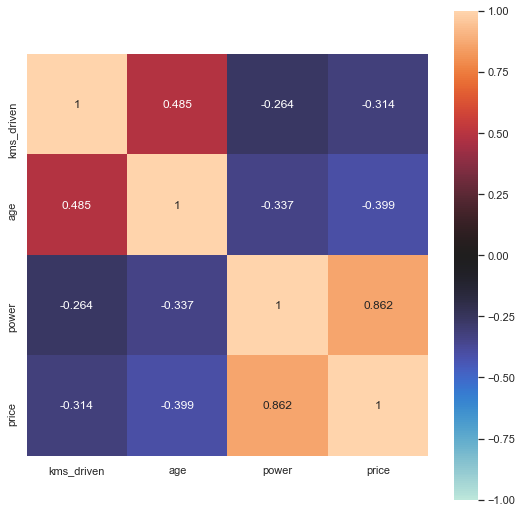

In [25]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.heatmap(df_for_corr_others.corr(), annot=True, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

### Price and Brand

<AxesSubplot:>

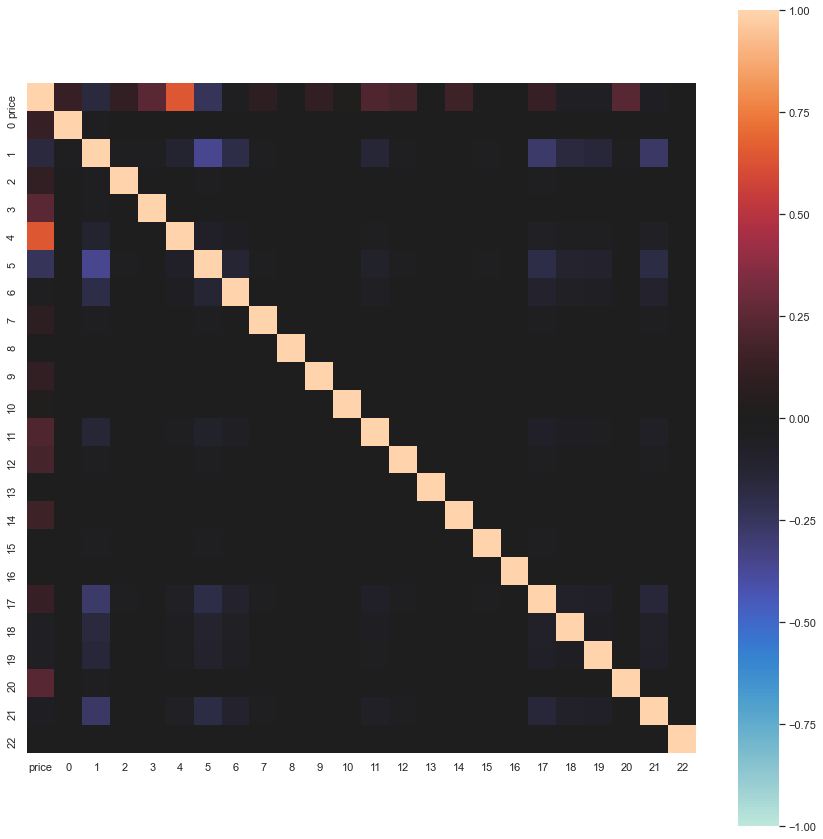

In [26]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df_for_corr_brand.corr(), annot=False, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

# Modelling

In [27]:
df.head()

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,17654,1,3,110,35000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11000,1,4,350,119900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,110,1,8,675,600000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,16329,1,4,180,65000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,10000,1,3,150,80000


In [28]:
X = np.array(df.drop(['price'],1))
y = np.array(df['price'])

print(X)
print(y)

[[  0.   0.   0. ...   1.   3. 110.]
 [  0.   0.   0. ...   1.   4. 350.]
 [  0.   0.   0. ...   1.   8. 675.]
 ...
 [  0.   1.   0. ...   1.   6. 220.]
 [  0.   0.   0. ...   1.  16. 125.]
 [  0.   1.   0. ...   1.  13. 150.]]
[ 35000 119900 600000 ...  60000  15600  22000]


### Train The Datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f'X_train :\n{X_train}')
print('')
print(f'X_test :\n{X_train}')
print('')
print(f'y_train :\n{y_train}')
print('')
print(f'y_test :\n{y_test}')

X_train :
[[  0.   1.   0. ...   1.   5. 220.]
 [  0.   1.   0. ...   1.   9. 150.]
 [  0.   0.   0. ...   1.   4. 100.]
 ...
 [  0.   0.   0. ...   1.   5. 160.]
 [  0.   1.   0. ...   1.   6. 100.]
 [  0.   1.   0. ...   2.  11. 220.]]

X_test :
[[  0.   1.   0. ...   1.   5. 220.]
 [  0.   1.   0. ...   1.   9. 150.]
 [  0.   0.   0. ...   1.   4. 100.]
 ...
 [  0.   0.   0. ...   1.   5. 160.]
 [  0.   1.   0. ...   1.   6. 100.]
 [  0.   1.   0. ...   2.  11. 220.]]

y_train :
[80000 25000 39000 ... 45000 23000 41000]

y_test :
[ 18000  43000  10000 ... 670000  46000  70000]


In [31]:
print('Total of X_train : ',len(X_train))
print('Total of y_train : ',len(y_train))
print('Total of X_test  : ',len(X_test))
print('Total of y_test  : ',len(y_test))

Total of X_train :  26118
Total of y_train :  26118
Total of X_test  :  6530
Total of y_test  :  6530


### Use some models

In [32]:
metrics = pd.DataFrame(index=['r2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Linear', 'Lasso', 'Ridge'])

#### Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predict_lr = lr.predict(X_test)
y_predict_lr

y_predict_lr_train = lr.predict(X_train)
y_predict_lr_train

array([71909.84017944, 23245.4078064 , 33750.81911469, ...,
       67118.10459137,  8297.99021912, 50352.78510284])

In [35]:
metrics.loc['r2 Score', 'Linear'] = r2_score(y_test, y_predict_lr)
metrics.loc['MAE', 'Linear'] = mean_absolute_error(y_test, y_predict_lr)
metrics.loc['MSE', 'Linear'] = mean_squared_error(y_test, y_predict_lr)
metrics.loc['RMSE', 'Linear'] = sqrt(mean_squared_error(y_test, y_predict_lr))

In [36]:
print('RMSE     = ',sqrt(mean_squared_error(y_test,y_predict_lr))) 
print('r2 score = ',r2_score(y_test, y_predict_lr))

RMSE     =  33969.108855241764
r2 score =  0.8675117532629893


In [37]:
print('RMSE     = ',sqrt(mean_squared_error(y_train,y_predict_lr_train))) 
print('r2 score = ',r2_score(y_train, y_predict_lr_train))

RMSE     =  26509.284615583543
r2 score =  0.9133444704377123


#### Lasso Regression

In [38]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [39]:
y_predict_lasso = lasso.predict(X_test)
y_predict_lasso

array([ 24515.09502786,  49943.0903792 ,   2770.31964565, ...,
       507255.97834233,  33834.64247139,  71724.1497198 ])

In [40]:
metrics.loc['r2 Score', 'Lasso'] = r2_score(y_test, y_predict_lasso)
metrics.loc['MAE', 'Lasso'] = mean_absolute_error(y_test, y_predict_lasso)
metrics.loc['MSE', 'Lasso'] = mean_squared_error(y_test, y_predict_lasso)
metrics.loc['RMSE', 'Lasso'] = sqrt(mean_squared_error(y_test, y_predict_lasso))

#### Ridge Regression

In [41]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train) 

Ridge(alpha=0.001)

In [42]:
y_predict_ridge = ridge.predict(X_test)
y_predict_ridge

array([ 24514.94574861,  49943.15935073,   2769.9042329 , ...,
       507257.17395549,  33834.16521423,  71724.35040568])

In [43]:
metrics.loc['r2 Score', 'Ridge'] = r2_score(y_test, y_predict_ridge)
metrics.loc['MAE', 'Ridge'] = mean_absolute_error(y_test, y_predict_ridge)
metrics.loc['MSE', 'Ridge'] = mean_squared_error(y_test, y_predict_ridge)
metrics.loc['RMSE', 'Ridge'] = sqrt(mean_squared_error(y_test, y_predict_ridge))

### Table of Accuracy

In [44]:
100*metrics

,Linear,Lasso,Ridge
r2 Score,86.7512,86.7511,86.751
MAE,1.38517e+06,1.38517e+06,1.38519e+06
MSE,1.1539e+11,1.15391e+11,1.15392e+11
RMSE,3.39691e+06,3.39692e+06,3.39694e+06


# Simulation

In [45]:
df.head()

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,17654,1,3,110,35000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11000,1,4,350,119900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,110,1,8,675,600000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,16329,1,4,180,65000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,10000,1,3,150,80000


In [46]:
# input the new data here

data = {
    'BMW'              :[0],
    'Bajaj'            :[0],
    'Benelli'          :[0],
    'Ducati'           :[0],
    'Harley_Davidson'  :[0],
    'Hero'             :[0],
    'Honda'            :[1],
    'Hyosung'          :[0],
    'Ideal'            :[0],
    'Indian'           :[0],
    'Jawa'             :[0],
    'KTM'              :[0],
    'Kawasaki'         :[0],
    'LML'              :[0],
    'MV'               :[0],
    'Mahindra'         :[0],
    'Rajdoot'          :[0],
    'Royal Enfield'    :[0],
    'Suzuki'           :[0],
    'TVS'              :[0],
    'Triumph'          :[0],
    'Yamaha'           :[0],
    'Yezdi'            :[0],
    
    'kms_driven'       :[1000],
    'owner'            :[1],
    'age'              :[4],
    'power'            :[400],
}

simulation = pd.DataFrame(data)
simulation

,BMW,Bajaj,Benelli,Ducati,Harley_Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi,kms_driven,owner,age,power
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1000,1,4,400


In [47]:
X_new = np.array(simulation)

## Result of Simulation

In [48]:
y_new_prediction = lr.predict(X_new)
y_new_prediction

array([190003.66990662])